In [2]:
# these are all the libraries requires for the project to run
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score # for performance metric
from sklearn.linear_model import Perceptron # for perceptron  model
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt # plotting 
from sklearn.model_selection import train_test_split  # this is for spiltting the dataset in test and train set
from sklearn.metrics import confusion_matrix 
from sklearn.utils.multiclass import unique_labels # used to label the unique classes for multi class classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize 
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns # this is used for plotting, like matploitlib but better
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [3]:
#Loading training set into dataframe
train = pd.read_csv('/content/KDDTrain+.txt', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#Loading testing set into dataframe
test = pd.read_csv('/content/KDDTest+.txt', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
#Reset column names for training set
train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
#Reset column names for testing set
test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [7]:
column= 'difficulty_level'  # we don't need it in this project
train = train.drop(column, 1)
test=test.drop(column,1)

In [9]:
train.shape,test.shape

((125973, 42), (22544, 42))

In [10]:
train.isnull().values.any()

False

In [11]:
test.isnull().values.any()

False

In [17]:
#defining col list
cols = ['protocol_type','service','flag']
cols

['protocol_type', 'service', 'flag']

iN  order to convert catrgorical variables into numerical values, we need to do encoding. In this case, we are using one hot encoding.

In [18]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [19]:
#Merging train and test data
combined_data = pd.concat([train,test])

In [20]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)

In [21]:
#Splitting the combined data back into training and testing
new_train = combined_data.iloc[:125973]
new_test = combined_data.iloc[125973:]

even for the numerical features or variables, we need to bring all the numerical valuables to the same scale or normalize them.

In [22]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [23]:
#Dropping subclass column for training set
tmp = new_train.pop('subclass')

In [24]:
#dropping subclass solumn for testing set
testtmp = new_test.pop('subclass')


In [25]:
#Normalizing training set
new_train_df = normalize(new_train,new_train.columns)
new_train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [26]:
#Normalizing testing set
new_test_df = normalize(new_test,new_test.columns)
new_test_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.448141,0.019569,0.0,0.00,1.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.266145,0.001957,0.0,0.00,1.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001957,0.127202,0.0,0.00,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001957,0.015656,0.0,0.12,1.0,0.5,1.00,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003914,0.021526,0.0,0.00,0.0,0.0,1.00,0.00,0.18,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0

In [27]:
#Fixing labels for training set
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in tmp:
    if item in check1:
        classlist.append("DoS")
    elif item in check2:
        classlist.append("Probe")
    elif item in check3:
        classlist.append("U2R")
    elif item in check4:
        classlist.append("R2L")
    else:
        classlist.append("Normal")

In [28]:
#Appending class column to training set
new_train_df["Class"] = classlist

In [29]:
#Fixing labels for testing
testclasslist = []
testcheck1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
testcheck2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
testcheck3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
testcheck4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster",
              "xlock","xsnoop")

for testitem in testtmp:
    if testitem in testcheck1:
        testclasslist.append("DoS")
    elif testitem in testcheck2:
        testclasslist.append("Probe")
    elif testitem in testcheck3:
        testclasslist.append("U2R")
    elif testitem in testcheck4:
        testclasslist.append("R2L")
    else:
        testclasslist.append("Normal")

In [31]:
#Appending Class column to testing set
new_test_df["Class"] = testclasslist

Text(0.5, 1.0, 'Attack types in Training data')

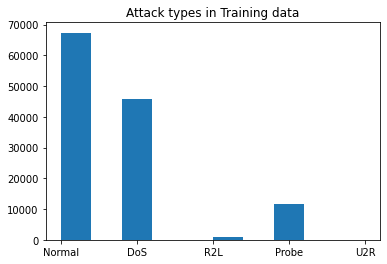

In [32]:

plt.hist(new_train_df["Class"])
plt.title("Attack types in Training data")

Text(0.5, 1.0, 'Attack types in Testing data')

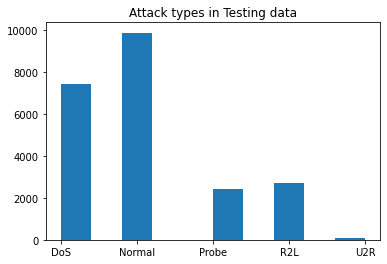

In [33]:
plt.hist(new_test_df["Class"])
plt.title("Attack types in Testing data")

In [34]:
#Preparing X_train, Y_train
trainingdata = new_train_df.values
X_train = trainingdata[:,:-1]# These are the input coloumns which will help us to predict the output (Y) coloumn
Y_train = trainingdata[:,-1] # Y contains all the attacks. Using x we want to learn Y

In [36]:
X_train.shape

(125973, 122)

In [37]:
#Preparing X_test and Y_test
testingdata = new_test_df.values
X_test = testingdata[:,:-1]
Y_test = testingdata[:,-1]

In [38]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  # This function is written to get the ROC_AUC score
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [39]:
#PLA
perceptron = Perceptron (tol=1e-3) # initializing classifier
perceptron.fit(X_train, Y_train) # fit data
#############use and evaluate model##################
train_acc = perceptron.score(X_train, Y_train) # mean acc on train data
test_acc = perceptron.score(X_test, Y_test) # mean acc on test data
y_pred_precp = perceptron.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9784001333619109
Testing accuracy is: 0.7526171043293116


Y pred is the predicted output or predicted y values by the model trained on training data.

In [41]:
#Perceptron performance metrics
PLA_f1score = f1_score(Y_test, y_pred_precp, average="macro")
PLA_precision = precision_score(Y_test, y_pred_precp, average="macro")
PLA_recall = recall_score(Y_test, y_pred_precp, average="macro")
PLA_accuracy = accuracy_score(Y_test, y_pred_precp)
PLA_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_precp)
print(PLA_f1score,PLA_precision,PLA_recall,PLA_accuracy,PLA_roc_auc_score)

0.4996531683882114 0.6437814358602788 0.49181870954469487 0.7526171043293116 0.7037027083289338


In [42]:
#Logistic Regression
lr = LogisticRegression (solver='liblinear', multi_class='auto') # use all default parameters
# predication and performance evaluation are the same as Perceptron
lr.fit(X_train, Y_train) # fit data
#############use and evaluate model##################
train_acc = lr.score(X_train, Y_train) # mean acc on train data
test_acc = lr.score(X_test, Y_test) # mean acc on test data
y_pred_lr = lr.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9762806315639065
Testing accuracy is: 0.7499556422995032


In [44]:
#Logistic Regression performance metrics
Logistic_f1 = f1_score(Y_test, y_pred_lr, average="macro")
Logistic_precision = precision_score(Y_test, y_pred_lr, average="macro")
Logistic_recall = recall_score(Y_test, y_pred_lr, average="macro")
Logistic_accuracy = accuracy_score(Y_test, y_pred_lr)
Logistic_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_lr)
print(Logistic_f1,Logistic_precision,Logistic_recall,Logistic_accuracy,Logistic_roc_auc_score)

0.47802053186785187 0.6351800029393297 0.48748448969855673 0.7499556422995032 0.7014519586167994


In [45]:
#Neural Network 1
clf_mlp1 = MLPClassifier (hidden_layer_sizes =(4,6,8)) # init classifier with three hidden layers with 4, 6, and 8 hidden units, respectively.


train_acc = clf_mlp1.score(X_train, Y_train) # mean acc on train data
test_acc = clf_mlp1.score(X_test, Y_test) # mean acc on test data
y_pred_mlp1 = clf_mlp1.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9939748993832012
Testing accuracy is: 0.7286195883605394


In [46]:
#NN performance metrics
Neural_f1 = f1_score(Y_test, y_pred_mlp1, average="macro")
Neural_precision = precision_score(Y_test, y_pred_mlp1, average="macro")
Neural_recall = recall_score(Y_test, y_pred_mlp1, average="macro")
Neural_accuracy = accuracy_score(Y_test, y_pred_mlp1)
Neural_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_mlp1)
print(Neural_f1,Neural_precision,Neural_recall,Neural_accuracy,Neural_roc_auc_score)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4823612358387502 0.5754579906958804 0.4732981318793998 0.7286195883605394 0.6902130094087164


In [47]:
clf_mlp2= MLPClassifier (hidden_layer_sizes =(200,)) # init classifier with one hidden layer with 200 hidden units
clf_mlp2.fit(X_train, Y_train) # fit data
train_acc = clf_mlp2.score(X_train, Y_train) # mean acc on train data
test_acc = clf_mlp2.score(X_test, Y_test) # mean acc on test data
y_pred_mlp2 = clf_mlp2.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9981424590983782
Testing accuracy is: 0.7899219304471257


In [48]:
#NN performance metrics
Neural2_f1 = f1_score(Y_test, y_pred_mlp2, average="macro")
Neural2_precision = precision_score(Y_test, y_pred_mlp2, average="macro")
Neural2_recall = recall_score(Y_test, y_pred_mlp2, average="macro")
Neural2_accuracy = accuracy_score(Y_test, y_pred_mlp2)
Neural2_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_mlp2)
print(Neural2_f1,Neural2_precision,Neural2_recall,Neural2_accuracy,Neural2_roc_auc_score)

0.6159262980129495 0.6505986418517956 0.6112783027450666 0.7899219304471257 0.7723479867445285


In [49]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
train_acc = dt.score(X_train, Y_train) # mean acc on train data
test_acc = dt.score(X_test, Y_test) # mean acc on test data
y_pred_DT = dt.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999833297611393
Testing accuracy is: 0.7620209368346345


In [50]:
#Decision Tree Performance Metrics
Tree_f1 = f1_score(Y_test, y_pred_DT, average="macro")
Tree_precision = precision_score(Y_test, y_pred_DT, average="macro")
Tree_recall = recall_score(Y_test, y_pred_DT, average="macro")
Tree_accuracy = accuracy_score(Y_test, y_pred_DT)
Tree_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_DT)
print(Tree_f1,Tree_precision,Tree_recall,Tree_accuracy,Tree_roc_auc_score)

0.5374798508217526 0.7018275896324392 0.5203171733452451 0.7620209368346345 0.7216302888134283


In [51]:
#Uniform Aggregation for PLA, logistic regression, NN and decision trees
clf1 = Perceptron (tol=1e-3)
clf2 = LogisticRegression (solver='liblinear', multi_class='auto')
clf3 = MLPClassifier (hidden_layer_sizes =(4,6,8))
clf4 = DecisionTreeClassifier()

votingclf = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
eclf1 = votingclf.fit(X_train,Y_train)
train_acc = eclf1.score(X_train, Y_train) # mean acc on train data
test_acc = eclf1.score(X_test, Y_test) # mean acc on test data
y_pred_voting_classifier = eclf1.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9883546474244481
Testing accuracy is: 0.7590933286018453


In [52]:
Uniform_f1 = f1_score(Y_test, y_pred_voting_classifier, average="macro")
Uniform_precision = precision_score(Y_test, y_pred_voting_classifier, average="macro")
Uniform_recall = recall_score(Y_test, y_pred_voting_classifier, average="macro")
Uniform_accuracy = accuracy_score(Y_test, y_pred_voting_classifier)
Uniform_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_voting_classifier)
print(Uniform_f1,Uniform_precision,Uniform_recall,Uniform_accuracy,Uniform_roc_auc_score)

0.48951466351453715 0.6390649199077717 0.49012334521697004 0.7590933286018453 0.704224165398191


In [53]:
#Bagging with PLA
PLA_clf = Perceptron (tol=1e-3)

bagging = BaggingClassifier(base_estimator = PLA_clf)
bagging.fit(X_train,Y_train)
train_acc = bagging.score(X_train, Y_train) # mean acc on train data
test_acc = bagging.score(X_test, Y_test) # mean acc on test data
y_pred_bagging = bagging.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9813531471029506
Testing accuracy is: 0.756165720369056


In [54]:
Bagging_f1 = f1_score(Y_test, y_pred_bagging, average="macro")
Bagging_precision = precision_score(Y_test, y_pred_bagging, average="macro")
Bagging_recall = recall_score(Y_test, y_pred_bagging, average="macro")
Bagging_accuracy = accuracy_score(Y_test, y_pred_bagging)
Bagging_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_bagging)
print(Bagging_f1,Bagging_precision,Bagging_recall,Bagging_accuracy)

0.5203236171691425 0.7369775074774689 0.5031568369416974 0.756165720369056


In [55]:
#AdaBoost with decision tree 
decision_clf = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(decision_clf)
adaboost.fit(X_train,Y_train)
train_acc = adaboost.score(X_train, Y_train) # mean acc on train data
test_acc = adaboost.score(X_test, Y_test) # mean acc on test data
y_pred_Ada = adaboost.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.999833297611393
Testing accuracy is: 0.752971965933286


In [56]:
#Performance Metrics for Adaboost
Ada_f1 = f1_score(Y_test, y_pred_Ada, average="macro")
Ada_precision = precision_score(Y_test, y_pred_Ada, average="macro")
Ada_recall = recall_score(Y_test, y_pred_Ada, average="macro")
Ada_accuracy = accuracy_score(Y_test, y_pred_Ada)
Ada_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_Ada)
print(Ada_f1,Ada_precision,Ada_recall,Ada_accuracy,Ada_roc_auc_score)

0.4859537950358523 0.6757545906249354 0.4682954724306897 0.752971965933286 0.691556747705288


In [57]:
#Random Forest
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
train_acc = RF.score(X_train, Y_train) # mean acc on train data
test_acc = RF.score(X_test, Y_test) # mean acc on test data
y_pred_rf = RF.predict(X_test) # make prediction
print("Training accuracy is:", train_acc )
print("Testing accuracy is:", test_acc)

Training accuracy is: 0.9998412358203742
Testing accuracy is: 0.7641501064584811


In [58]:
#Performance Metrics for Random Forest
RandomForest_f1 = f1_score(Y_test, y_pred_rf, average="macro")
RandomForest_precision = precision_score(Y_test, y_pred_rf, average="macro")
RandomForest_recall = recall_score(Y_test, y_pred_rf, average="macro")
RandomForest_accuracy = accuracy_score(Y_test, y_pred_rf)
RandomForest_roc_auc_score= multiclass_roc_auc_score(Y_test,y_pred_rf)

# print(classification_report(y_true, y_pred, labels=[1, 2, 3]))
print(RandomForest_f1, RandomForest_precision, RandomForest_recall, RandomForest_accuracy,RandomForest_roc_auc_score)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4892991391825853 0.6900631902946388 0.48281955106683805 0.7641501064584811 0.7004012519555542


In [59]:
#Displaying performance metrics 
data = [["Perceptron",PLA_accuracy,PLA_precision,PLA_recall,PLA_f1score,PLA_roc_auc_score],["Logistic Regression",Logistic_accuracy,
Logistic_precision,Logistic_recall,Logistic_f1,Logistic_roc_auc_score],["NN(Multi layered perceptron)",Neural_accuracy,Neural_precision,
Neural_recall,Neural_f1,Neural_roc_auc_score],["NN2(Multi layered perceptron with 200 hidden units)",Neural2_accuracy,Neural2_precision,
Neural2_recall,Neural2_f1,
Neural2_roc_auc_score],["Decision Tree",Tree_accuracy,Tree_precision,Tree_recall,Tree_f1,Tree_roc_auc_score],["Voting_classifier",
Uniform_accuracy,Uniform_precision,Uniform_recall,Uniform_f1,Uniform_roc_auc_score],["Bagging of Perceptrons",Bagging_accuracy,
Bagging_precision,Bagging_recall,Bagging_f1,Bagging_roc_auc_score],["AdaBoost",Ada_accuracy,Ada_precision,Ada_recall,Ada_f1,Ada_roc_auc_score],
["Random Forest",RandomForest_accuracy,RandomForest_precision,RandomForest_recall,RandomForest_f1,RandomForest_roc_auc_score]]
Results = pd.DataFrame(data,columns = ['','Mean Acc','Mean Precision','Mean Recall','Mean F1','Mean ROC_AUC_Score'])
Results

,,Mean Acc,Mean Precision,Mean Recall,Mean F1,Mean ROC_AUC_Score
0,Perceptron,0.752617,0.643781,0.491819,0.499653,0.703703
1,Logistic Regression,0.749956,0.635180,0.487484,0.478021,0.701452
2,NN(Multi layered perceptron),0.728620,0.575458,0.473298,0.482361,0.690213
3,NN2(Multi layered perceptron with 200 hidden u...,0.789922,0.650599,0.611278,0.615926,0.772348
4,Decision Tree,0.762021,0.701828,0.520317,0.537480,0.721630
5,Voting_classifier,0.759093,0.639065,0.490123,0.489515,0.704224
6,Bagging of Perceptrons,0.756166,0.736978,0.503157,0.520324,0.710081
7,AdaBoost,0.752972,0.675755,0.468295,0.485954,0.691557
8,Random Forest,0.764150,0.690063,0.482820,0.489299,0.700401


In [60]:
class_names = ["Normal","DoS","Probe","U2R","R2L"]  

In [61]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None,cmap=plt.cm.ocean_r):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

 
    cm = confusion_matrix(y_true, y_pred)

   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[6060 1389   11    0    0]
 [ 417 9189  279    2    2]
 [ 123  635 1566   97    0]
 [   4 2546    4  151    2]
 [   0   62    0    4    1]]


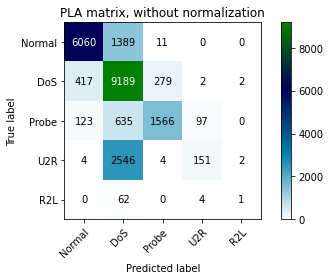

In [62]:
#Perceptron confusion matrix
classifier = Perceptron (tol=1e-3)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='PLA matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[6069 1377   14    0    0]
 [  88 9190  608    2    1]
 [ 167  594 1632   28    0]
 [   3 2685    4   15    0]
 [   0   66    0    0    1]]


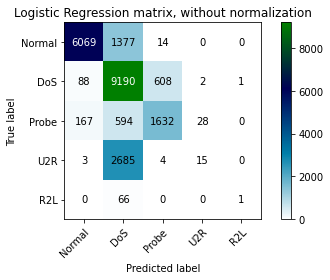

In [63]:
#Logistic Regression Matrix
classifier = LogisticRegression (solver='liblinear', multi_class='auto')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Logistic Regression matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[5510 1797  150    3    0]
 [  60 9204  619    6    0]
 [ 174  329 1918    0    0]
 [   1 2655   15   36    0]
 [   0   47    7    7    6]]


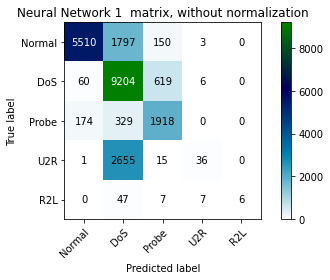

In [64]:
#NN confusion matrix
classifier = MLPClassifier (hidden_layer_sizes =(4,6,8))
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Neural Network 1  matrix, without normalization')
plt.show()

In [ ]:
clf_mlp2= MLPClassifier (hidden_layer_sizes =(200,)) # init classifier with one hidden layer with 200 hidden units
clf_mlp2.fit(X_train, Y_train).predict(X_test) # fit data
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Neural Network 2  matrix, without normalization')
plt.show()

In [ ]:
#Confusion Matrix for decision tree
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Decision Tree, without normalization')
plt.show()

In [ ]:
classifier = VotingClassifier(estimators=[('PLA', clf1), ('LR', clf2), ('NN', clf3),('Tree',clf4)], voting='hard')
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Uniform Aggregation, without normalization')
plt.show()

In [ ]:
#Bagging with PLA confusion matrix
classifier = BaggingClassifier(base_estimator = PLA_clf)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Bagging with PLA, without normalization')
plt.show()

In [ ]:
#Adaboost Confusion matrix
decision_clf = DecisionTreeClassifier()
classifier = AdaBoostClassifier(decision_clf)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Adaboost , without normalization')
plt.show()

In [ ]:
#Random Forest Confusion matrix

classifier = RandomForestClassifier()
y_pred = classifier.fit(X_train, Y_train).predict(X_test)
plot_confusion_matrix(Y_test, y_pred, classes=class_names,title='Random Forest, without normalization')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
loss_values = clf_mlp1.loss_curve_
plt.plot(loss_values)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Loss curve of Multi layered perceptron with 3 layers of four, six and eight hidden units")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
loss_values = clf_mlp2.loss_curve_
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Loss curve of Multi layered perceptron with 1 layer 200 hidden units")
plt.plot(loss_values)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# loss_values = clf_mlp2.loss_curve_
# plt.plot(loss_values)
# plt.show()

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

#plotting ROC curve for Logistic Regression
plot_multiclass_roc(lr, X_test, Y_test, n_classes=5, figsize=(16, 10))

In [ ]:
# models comparison
# ,"Bagging". ,[Bagging_accuracy]
columns = ['Average Accuracy Score']
rows = ['Perceptron', 'LR', 'MLP1', 'MLP2', 'DT', 'RF','Voting','AdaBoost','Bagging']
scores = [[PLA_accuracy], [Logistic_accuracy], [Neural_accuracy], [Neural2_accuracy], 
          [Tree_accuracy], [RandomForest_accuracy],[Uniform_accuracy],[Ada_accuracy],[Bagging_accuracy]]
AUC_scores= [[PLA_roc_auc_score],[Logistic_roc_auc_score],[Neural_roc_auc_score],[Neural2_roc_auc_score],[Tree_roc_auc_score],
             [RandomForest_roc_auc_score],[Uniform_roc_auc_score],[Ada_roc_auc_score],[Bagging_roc_auc_score]]          

table = pd.DataFrame(data = scores, columns = columns, index = rows)
# table2 = pd.DataFrame(data=AUC_scores,columns = columns, index = rows)
print(table)
# print(table2)

In [ ]:
# graphical comparison of Accuracy and ROC_AUC scores

n_groups = 9
acc = [item[0] for item in scores]
AUC_score = [item[0] for item in AUC_scores]
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6
 
rects = plt.bar(index, acc, bar_width, alpha = opacity, align = 'center', label = 'Avg Accuracy ')
rects1= plt.bar(index, AUC_score, bar_width, alpha = opacity, align = 'edge', label = 'Avg AUC Scores')
plt.xlabel('Models')
plt.ylabel('Average Accuracy and ROC AUC Score')
plt.title('Graphical Comparison of performances of all models')
plt.xticks(index -bar_width, rows)
# plt.yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05], [0.95, 0.96, 0.97, 0.98, 0.99, 1.00])
plt.legend(loc='upper right',)

fig = plt.tight_layout(rect = (0, 0, 1.4, 1.4))
plt.show()

In [ ]:
n_inputs = X_train.shape[0]
print(n_inputs)

In [ ]:
Y_train.shape

In [ ]:

# # Shared Feature Extraction Layer
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers.recurrent import LSTM
# from keras.layers.merge import concatenate
# # define input
# visible = Input(shape=X_train.shape)
# # feature extraction
# extract1 = LSTM(10)(visible)
# # first interpretation model
# interp1 = Dense(10, activation='relu')(extract1)
# # second interpretation model
# interp11 = Dense(10, activation='relu')(extract1)
# interp12 = Dense(20, activation='relu')(interp11)
# interp13 = Dense(10, activation='relu')(interp12)
# # merge interpretation
# merge = concatenate([interp1, interp13])
# # output
# output = Dense(Y_train.shape[0], activation='sigmoid')(merge)
# model = Model(inputs=visible, outputs=output)
# # summarize layers
# print(model.summary())
# # plot graph
# plot_model(model, to_file='shared_feature_extractor.png')

In [ ]:
Y_train

In [ ]:
# from keras.layers import Dense
# from keras.models import Sequential
# model = Sequential()
# model.add(Dense(128, input_dim = 122, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(, activation = 'softmax'))
# model.compile(
#     loss = 'binary_crossentropy',
#     optimizer='adam', metrics=['accuracy'])
# model.summary()

# model.fit(np.array(X_train, dtype=np.float), Y_train, epochs = 100, batch_size = 128, verbose = 1)

In [ ]:
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from keras.callbacks import EarlyStopping
# model = Sequential()
# # model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
# model.add(SpatialDropout1D(0.7))
# model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# model.add(Dense(4, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, Y_train, epochs=10, batch_size=16,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

In [ ]:
# Installing Autokeras
# !pip3 install autokeras

Training an AutoEncoder

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LeakyReLU
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.utils import plot_model
# from matplotlib import pyplot
# # number of input columns
# n_inputs = X_train.shape[1]
# # define encoder
# visible = Input(shape=(n_inputs,))
# # encoder level 1
# e = Dense(n_inputs*2)(visible)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# # encoder level 2
# e = Dense(n_inputs)(e)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# # bottleneck
# n_bottleneck = round(float(n_inputs) / 2.0)
# bottleneck = Dense(n_bottleneck)(e)
# # define decoder, level 1
# d = Dense(n_inputs)(bottleneck)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)
# # decoder level 2
# d = Dense(n_inputs*2)(d)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)
# # output layer
# output = Dense(n_inputs, activation='linear')(d)
# # define autoencoder model
# model = Model(inputs=visible, outputs=output)
# # compile autoencoder model
# model.compile(optimizer='adam', loss='categorical_crossentropy')
# # plot the autoencoder
# plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# # fit the autoencoder model to reconstruct input
# history = model.fit(np.array(X_train, dtype=np.float), np.array(X_train, dtype=np.float), epochs=15, batch_size=16, verbose=2, validation_data=(np.array(X_test, dtype=np.float),np.array(X_test, dtype=np.float)))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
# # define an encoder model (without the decoder)
# encoder = Model(inputs=visible, outputs=bottleneck)
# plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# # save the encoder to file
# # encoder.save('encoder.h5')
# # np.array(*your list*, dtype=np.float)